# 01 Load and Explore Events

We have a lot of different events generated for different detectors. This notebook shows you with examples the functionalities of the event classes. Particularly, how to load events generated by olympus and how to modify the events to be prepared for the dataset generation at a later point

## Table of Contents
* [Import Dependencies](#dependencies)
* [Load Event Collection from Olympus](#load-events)
* [Explore the Event Class](#event)
* [Explore the EventCollection Class](#event-collection)

## Import Dependencies <a class="anchor" id="dependencies"></a>

In [14]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')
sys.path.append('../../olympus')

import matplotlib.pyplot as plt
import numpy as np

from apollo.data.importers import EventCollectionImporter
from apollo.utils.detector_helpers import get_line_detector
from apollo.data.configs import Interval, HistogramConfig
from apollo.data.events import EventTimeframeMode

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Event Collection from Olympus <a class="anchor" id="load-events"></a>

Before we can load the events we have to initialize the detector. The `detector_helpers` are quite useful, as they instanciate the detector like Olympus would.

In [15]:
detector = get_line_detector()

Now we can continue and load the events from the pickle files or folders.

In [6]:
event_collection = EventCollectionImporter.from_pickle('../../data/all/events_track_0.pickle', detector=detector)
# When you want to load the whole folder, use:
# event_collection = EventCollectionImporter.from_folder('../../data/all', detector=detector)

## Explore the Event Class<a class="anchor" id="event"></a>

The event class is the backbone of the individual event. Its functionalities mostly propagate to the event collection. Let's first get a cool event to play width.

In [7]:
current_event = None

for event in event_collection.events:
    if event.number_of_hits > 100:
        current_event = event
        break
        
current_event.as_features()

{'direction': {'x': 0.8600912399846907,
  'y': 0.3607499044601882,
  'z': 0.36069733203000315},
 'position': {'x': -92.48775640776485, 'y': -131.94373157862665, 'z': -550.0},
 'time': 0,
 'event_type': 'REALISTIC_TRACK',
 'energy': 828147.5423062275,
 'default_value': 0.0,
 'number_of_hits': 104,
 'percentiles': [749, 762, 851, 935, 960, 978, 1000, 1064, 1132, 1236, 1752]}

For creating random datasets with an event at multiple plases, it is useful to be able to move the event around. 

### Explore the TimeFrameModes

As there are multiple reference points for moving the event around, it makes sense to be able to reference multiple of them:
* `START_TIME`: The events start time is the reference
* `CONTAINS_HIT`: Makes sure that at least one hit is included
* `CONTAINS_EVENT`: Makes sure, if possible, that the whole event is included
* `CONTAINS_PERCENTILE`: Makes sure that a given percentile of hits are included (extra parameter percentile necessary)

### Redistribute the Event and Create histograms

Let's get it moving and create histograms according to the events.

In [8]:
interval = Interval(0, 1000)
histogram_config = HistogramConfig(start=interval.start, end=interval.end, bin_size=10)

raw_histogram = current_event.get_histogram(histogram_config)

current_event.redistribute(interval, is_in_timeframe_mode=EventTimeframeMode.START_TIME)
print('By Start Time: ', current_event.time)

start_time_histogram = current_event.get_histogram(histogram_config)

current_event.redistribute(interval, is_in_timeframe_mode=EventTimeframeMode.CONTAINS_HIT)
print('By Contains Hit: ', current_event.time)

contains_hit_histogram = current_event.get_histogram(histogram_config)

current_event.redistribute(interval, is_in_timeframe_mode=EventTimeframeMode.CONTAINS_EVENT)
print('By Contains Event: ', current_event.time)

contains_event_histogram = current_event.get_histogram(histogram_config)

current_event.redistribute(interval, is_in_timeframe_mode=EventTimeframeMode.CONTAINS_PERCENTAGE, percentile=50)
print('By Contains Percentile: ', current_event.time)

contains_percentile_histogram = current_event.get_histogram(histogram_config)

By Start Time:  546
By Contains Hit:  5
By Contains Event:  -749
By Contains Percentile:  -279


Let's have a look at it. How do the different events compare?

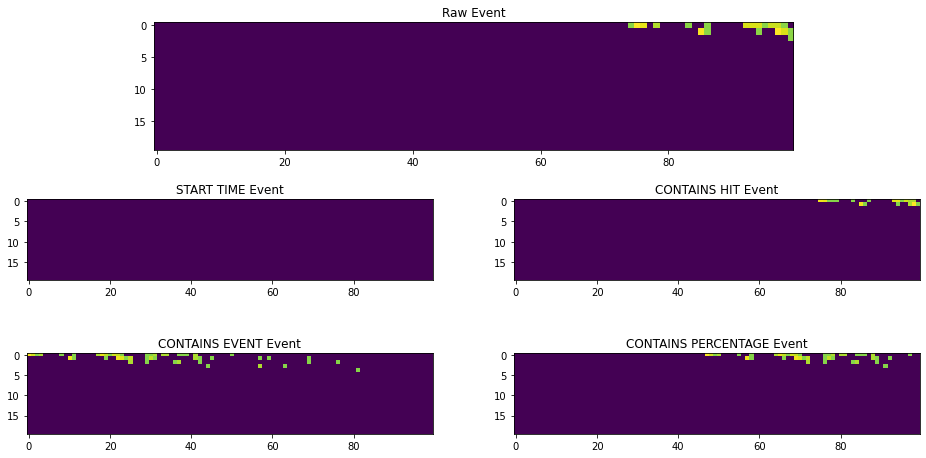

In [9]:
fig = plt.figure(figsize=(16, 8))

def plot_histogram(histogram, row, column, i, title):

    ax = fig.add_subplot(row, column, i)
    ax.set_title(title)
    result = np.where(histogram > 0.0000000001, histogram, -10)
    plt.imshow(np.log(result, out=result, where=result > 0))
    ax.set_aspect('equal')
    
plot_histogram(raw_histogram, 3, 1, 1, 'Raw Event')
    
plot_histogram(start_time_histogram, 3, 2, 3, 'START TIME Event')
    
plot_histogram(contains_hit_histogram, 3, 2, 4, 'CONTAINS HIT Event')
    
plot_histogram(contains_event_histogram, 3, 2, 5, 'CONTAINS EVENT Event')
    
plot_histogram(contains_percentile_histogram, 3, 2, 6, 'CONTAINS PERCENTAGE Event')

plt.show()

## Explore the EventCollection <a class="anchor" id="event-collection"></a>

### Access the Event Collection


In [10]:
# Subset with array like indexing
event_collection2 = event_collection[1:3]
print('Nr. of events: ', len(event_collection), ', ', type(event_collection))
print('Nr. of events: ', len(event_collection2), ', ', type(event_collection2))

Nr. of events:  100 ,  <class 'apollo.data.events.EventCollection'>
Nr. of events:  2 ,  <class 'apollo.data.events.EventCollection'>


In [11]:
# Concatenation like an array
event_collection3 = event_collection + event_collection2
print('Nr. of events: ', len(event_collection3), ', ', type(event_collection3))

Nr. of events:  102 ,  <class 'apollo.data.events.EventCollection'>


### Redistribute and show

Like the event class, the collection can be redistributed and showed

In [12]:
interval = Interval(0, 1000)
histogram_config = HistogramConfig(start=interval.start, end=interval.end, bin_size=10)

raw_histogram_collection = event_collection.get_histogram(histogram_config)

event_collection.redistribute(interval, is_in_timeframe_mode=EventTimeframeMode.START_TIME)

start_time_histogram_collection = event_collection.get_histogram(histogram_config)

event_collection.redistribute(interval, is_in_timeframe_mode=EventTimeframeMode.CONTAINS_HIT)

contains_hit_histogram_collection = event_collection.get_histogram(histogram_config)

event_collection.redistribute(interval, is_in_timeframe_mode=EventTimeframeMode.CONTAINS_EVENT)

contains_event_histogram_collection = event_collection.get_histogram(histogram_config)

event_collection.redistribute(interval, is_in_timeframe_mode=EventTimeframeMode.CONTAINS_PERCENTAGE, percentile=50)

contains_percentile_histogram_collection = event_collection.get_histogram(histogram_config)

Let's have a look again

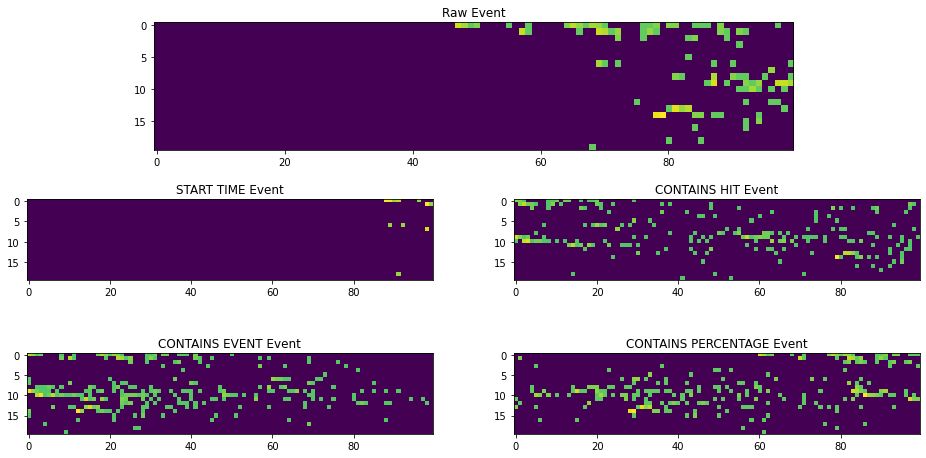

In [13]:
fig = plt.figure(figsize=(16, 8))

def plot_histogram(histogram, row, column, i, title):

    ax = fig.add_subplot(row, column, i)
    ax.set_title(title)
    result = np.where(histogram > 0.0000000001, histogram, -10)
    plt.imshow(np.log(result, out=result, where=result > 0))
    ax.set_aspect('equal')
    
plot_histogram(raw_histogram_collection, 3, 1, 1, 'Raw Event')
    
plot_histogram(start_time_histogram_collection, 3, 2, 3, 'START TIME Event')
    
plot_histogram(contains_hit_histogram_collection, 3, 2, 4, 'CONTAINS HIT Event')
    
plot_histogram(contains_event_histogram_collection, 3, 2, 5, 'CONTAINS EVENT Event')
    
plot_histogram(contains_percentile_histogram_collection, 3, 2, 6, 'CONTAINS PERCENTAGE Event')

plt.show()